In [1]:
import csv
import math
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.datasets import make_classification

import seaborn as sns

In [2]:
N_ATTRIBUTES = 501
N_TESTES = 50

balance1 = 0.16
balance2 = 0.19
balance3 = 0.32
balance4 = 0.48
linear1 = 0.25
linear2 = 0.25
linear3 = 0.25
linear4 = 0.25

In [3]:
def classificador_SVM(dfTest):
    df = dfTest
    
    X = df.drop('label',axis=1)
    y = df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

    clf = LinearSVC()
    #aqui
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)

    #print(classification_report(y_test,predictions))

    rfc_pred = clf.predict(X_test)

    #print(confusion_matrix(y_test,rfc_pred))
    return accuracy_score(y_test,predictions, normalize=True)
    

In [4]:
def classificadorRandomForest(dfTest):
    df = dfTest
    X = df.drop('label',axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
    rfc = RandomForestClassifier(n_estimators=10)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    return accuracy_score(y_test,rfc_pred, normalize=True)

In [5]:
def classificadorDecisionTree(dfTest):
    df = dfTest
    X = df.drop('label',axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtree_pred = dtree.predict(X_test)    
    return accuracy_score(y_test,dtree_pred, normalize=True)

In [6]:
def classificador_naive_bayes(dfTest):
    df = dfTest
    X = df.drop('label',axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)    
    rfc = GaussianNB()
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    return accuracy_score(y_test,rfc_pred, normalize=True)

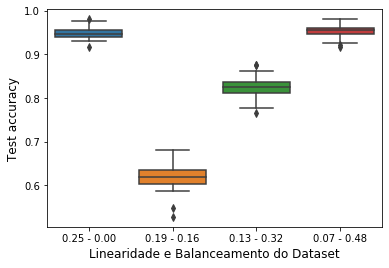

In [7]:
def coleta_accuracy(complexidade):
    bobj = complexidade
    data = pd.read_csv(str(N_ATTRIBUTES)+"_0,4_"+str(bobj)+".csv")
    lista = [];
    for i in range(N_TESTES) : 
        lista.append(classificadorRandomForest(data))
    df = pd.DataFrame(lista)
    return df
df = coleta_accuracy('0,0')
df1 = coleta_accuracy('0,16')
df2 = coleta_accuracy('0,32')
df3 = coleta_accuracy('0,48')
df.columns = ['0.25 - 0.00']
df['0.19 - 0.16'] = df1
df['0.13 - 0.32'] = df2
df['0.07 - 0.48'] = df3
plt.xlabel("Linearidade e Balanceamento do Dataset", fontsize=12)
plt.ylabel("Test accuracy", fontsize=12)
ax1 = sns.boxplot(data=df)

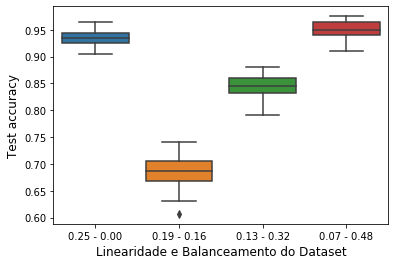

In [8]:
def coleta_accuracy(complexidade):
    bobj = complexidade
    dataa = pd.read_csv(str(N_ATTRIBUTES)+"_0,4_"+str(bobj)+".csv")
    listaa = [];
    for i in range(N_TESTES) : 
        listaa.append(classificador_naive_bayes(dataa))
    dfa = pd.DataFrame(listaa)
    return dfa
dfa = coleta_accuracy('0,0')
dfa1 = coleta_accuracy('0,16')
dfa2 = coleta_accuracy('0,32')
dfa3 = coleta_accuracy('0,48')
dfa.columns = ['0.25 - 0.00']
dfa['0.19 - 0.16'] = dfa1
dfa['0.13 - 0.32'] = dfa2
dfa['0.07 - 0.48'] = dfa3
plt.xlabel("Linearidade e Balanceamento do Dataset", fontsize=12)
plt.ylabel("Test accuracy", fontsize=12)
ax2 = sns.boxplot(data=dfa)

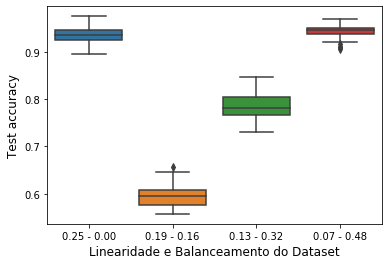

In [9]:
def coleta_accuracy(complexidade):
    bobj = complexidade
    datab = pd.read_csv(str(N_ATTRIBUTES)+"_0,4_"+str(bobj)+".csv")
    listab = [];
    for i in range(N_TESTES) : 
        listab.append(classificadorDecisionTree(datab))
    dfb = pd.DataFrame(listab)
    return dfb
dfb = coleta_accuracy('0,0')
dfb1 = coleta_accuracy('0,16')
dfb2 = coleta_accuracy('0,32')
dfb3 = coleta_accuracy('0,48')
dfb.columns = ['0.25 - 0.00']
dfb['0.19 - 0.16'] = dfb1
dfb['0.13 - 0.32'] = dfb2
dfb['0.07 - 0.48'] = dfb3
plt.xlabel("Linearidade e Balanceamento do Dataset", fontsize=12)
plt.ylabel("Test accuracy", fontsize=12)
ax3 = sns.boxplot(data=dfb)

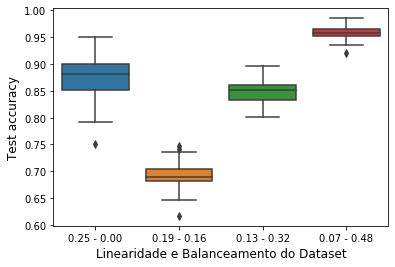

In [10]:
def coleta_accuracy(complexidade):
    bobj = complexidade
    datac = pd.read_csv(str(N_ATTRIBUTES)+"_0,4_"+str(bobj)+".csv")
    listac = [];
    for i in range(N_TESTES) : 
        listac.append(classificador_SVM(datac))
    dfc = pd.DataFrame(listac)
    return dfc
dfc = coleta_accuracy('0,0')
dfc1 = coleta_accuracy('0,16')
dfc2 = coleta_accuracy('0,32')
dfc3 = coleta_accuracy('0,48')
dfc.columns = ['0.25 - 0.00']
dfc['0.19 - 0.16'] = dfc1
dfc['0.13 - 0.32'] = dfc2
dfc['0.07 - 0.48'] = dfc3
plt.xlabel("Linearidade e Balanceamento do Dataset", fontsize=12)
plt.ylabel("Test accuracy", fontsize=12)
ax4 = sns.boxplot(data=dfc)